# **🏦 MBS PREPAYMENT RISK PREDICTION 🏦**

AUTHOR : **MACHINE LEARNING ENGINEER INTERN TEAM A**



mortgage-loan-concept_98292-1197.avif

# ⏰ THE PLAN ⏰

1.THE PROBLEM STATEMENT

2.IMPORTING THE LIBRARIES

3.LOADING THE DATASET

4.DATA STRUCTURE AND CONTENT

5.EDA AND PREPROCESSING THE DATA

# 1.PROBLEM STATEMENT

* Mortgage-backed securities (MBS) are a type of asset-backed security that is backed by a pool of mortgages.

* Prepayment risk refers to the risk that the homeowners whose mortgages are part of the pool will pay off their mortgages earlier than expected, which can impact the returns of the MBS.

 ⚛ AIM OF THE PROJECT ⚛

* **TO PREDICT THE MORTGAGE BACKED SECURITIRES PREPAYMENT RISK USING MACHINE LEARNING MODELS.**

 📫 DESCRIPTION OF THE GIVEN DATA 📫

 * The dataset has **2914952** data points and **26** columns in it.

 * CreditScore ---- The Credit Score of the Client.

 * FirstPaymentDate and MaturityDate ---- The formeris the date of the first mortage payment and the later is the date the loan is fully paid off.

 * FirstTimeHomeBuyer ---- Tells if the Borrower is a  first time home buyer or not.

 * MSA ---- Metropolitan Statistical Area code of the property.

 * MIP ---- Mortgage Insurance Premium, if applicable.

 * Units ---- Number of units in the property

 * Occupancy ---- Occupancy status of the property (e.g., owner-occupied, investment, secondary property etc.).

 * OCLTV ---- Original Combined Loan-to-Value ratio, which considers all loans on the property.

 * DTI ---- Debt to Income ratio of the borrower.

 * OrigUPB ----Original unpaid principal balance of the loan.

 * LTV ---- Loan To Value ratio at the time of loan origination.

 * Channel ---- The Origination Channel  used by the party that delivered loan to issuer like  retail, broker, correspondent etc.

 * PPM ---- The indicator denoting whether the borrower is subjected to a  penalty for a early payment of the principle.

 * ProductType ---- Type of mortgage product which is FRM (Fixed Rate Mortage).

 * PropertyState ---- The Abbreviation denoting the location of the property securing the loan.

 * PropertyType ---- The Classification describing the type of the property.

 * PostalCode ---- Zip code of the property.

 * LoanSeqNum ---- Unique loan sequence number for every borrower.

 * LoanPurpose ---- Purpose of the loan at the time of origination of the loan.

 * OrigLoanTerm ---- Original term of the loan in months.

 * NumBorrowers ---- Number of borrowers on the loan.

 * SellerName ---- Name of the entity that sold the loan to Freddie Mac Company.

 * ServicerName ---- Name of the entity servicing the loan at the time of origination.

 * EverDelinquent ---- Indicates if the borrower has ever been delinquent on the loan.

 * MonthsDelinquent ---- Number of months the borrower has been delinquent, if applicable.

 * MonthsInRepayment ---- Number of months the borrower has been in repayment.


PROJECT AIM AND CONTEXT

The aim of the project is to predict the prepayment risk associated with mortgage-backed securities (MBS) using machine learning models.

Mortgage-backed securities are financial instruments that represent ownership in a pool of mortgage loans. One key risk in the MBS market is the prepayment risk, which refers to the possibility that borrowers will repay their mortgages earlier than expected, leading to a change in the expected cash flows from the securities.

Problem Statement and Significance:
The problem we are addressing is the need for accurate and timely prediction of prepayment risk in the MBS market.

This is important in the financial industry, particularly for investors, lenders, and institutions involved in trading and managing MBS portfolios. Predicting prepayment risk allows market participants to make informed decisions, manage their portfolios effectively, and mitigate potential losses.

# 📚2.IMPORTING THE LIBRARIES📚

**Here we are importing the required libraries like Numpy,Pandas,Matplotlib,Seaborn which are used in the data loading,data cleaning and data preprocessing processes.**

In [ ]:
# For file handling and usage
import numpy as np
import pandas as pd
import warnings

# To handle the Missing and null values
from sklearn.impute import SimpleImputer

# For the Data Preprocessing and Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

# For data visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go

# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# For the Pipeline process
from sklearn.pipeline import Pipeline

# To avoid Warings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

#📑3.LOADING THE DATASETS📑

**Here The datasets have been uploaded directly and the colab is mounted with the the drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mbs = pd.read_csv("/content/drive/MyDrive/DataSets/LoanExport.csv")
# Reading the given  CSV dataset using the pandas libraries.

# 🧬4.DATA STRUCTURE AND CONTENT🧬

Here we intend to see what sort of data types present and what kind of values,size in the datasets.

In [ ]:
mbs.shape
# Here .shape returns the number of rows and columns present in the given dataset.

(291451, 28)

In [ ]:
mbs.dtypes
# The function .dtypes returns the data type of each column of the dataframe.

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [ ]:
mbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [ ]:
mbs.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


* In order to find out the uniques values present in the columns we use a small for loop to find it out.

In [ ]:
# Loop through all columns in the dataframe and print the unique values
for column in mbs.columns:
    print(column)
    print(mbs[column].unique())

CreditScore
[  0 335 342 363 366 370 375 391 396 445 462 466 471 476 477 478 479 481
 482 483 485 486 487 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681
 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699
 700 701 702 703 704 705 706 707 708 70

* To check the value counts present in the dataset we use the same for loop.

In [ ]:
# Loop through all columns in the dataframe and print the value counts
for column in mbs.columns:
    print(column)
    print(mbs[column].value_counts())

CreditScore
748    2567
734    2537
747    2456
753    2427
764    2419
       ... 
391       1
396       1
445       1
462       1
849       1
Name: CreditScore, Length: 370, dtype: int64
FirstPaymentDate
199905    104071
199904     91152
199903     89401
199902      2300
199906      2083
           ...  
201111         1
201303         1
200311         1
200403         1
200404         1
Name: FirstPaymentDate, Length: 66, dtype: int64
FirstTimeHomebuyer
N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64
MaturityDate
202904    104210
202903     91059
202902     89304
202901      2282
202905      2067
           ...  
202403         1
203304         1
203308         1
203210         1
203202         1
Name: MaturityDate, Length: 96, dtype: int64
MSA
X        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64
MIP
0     184

In [ ]:
mbs.isnull().sum()
# The .isnull.sum() returns the number of missing values in each column of the dataframe.

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [ ]:
mbs['SellerName'].unique()
# Rechecking one more time with .unique() method.

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [ ]:
mbs.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [ ]:
mbs.head()
# The .head() function gives the first few rows of the dataframe.

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [ ]:
mbs.tail()
# The .tail() function gives the last few rows of the dataframe.

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


# 🌠5.UNIVARIATE ANALYSIS 🌠

**Creating a backup copy before the Univariate Data Analysis**

* Here we are creating a back up copy where it can be used for the alteration purpose.

* The true changes like removing the null values and the unknown will be done in the EDA process.




> 1.**CREDIT SCORE - HIST PLOT**

> 2.**FIRST TIME HOME BUYER - COUNT PLOT**

> 3.**NUM BORROWERS - COUNT PLOT**

> 4.**PROPERTY STATE - CHLOROPETH GRAPH**

> 5.**OCCUPANCY - PIE CHART**

> 6.**OCLTV - DENSITY PLOT**

> 7.**MIP - VIOLIN PLOT**

> 8.**ORIGINAL INTEREST RATE - DISTRIBUTION PLOT**

> 9.**DTI - BOX PLOT**

> 10.**EVER DELINQUESENT - PIE PLOT**












In [ ]:
mbs_copy = mbs.copy()

## I).Credit Score - Hist Plot

In [ ]:
# Replacing the 0 values using the mean
mean_value = mbs_copy['CreditScore'].replace(0, np.nan).mean()
mbs_copy['CreditScore'] = mbs_copy['CreditScore'].replace(0, mean_value)

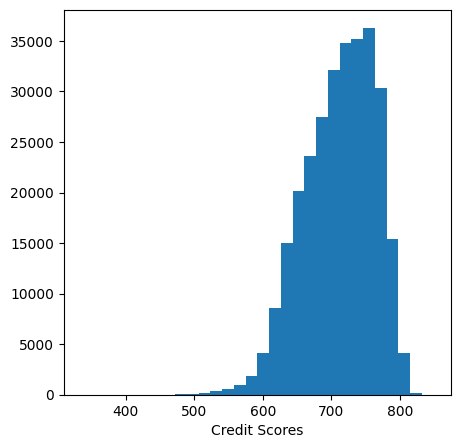

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(mbs_copy['CreditScore'],bins=30)
plt.xlabel('Credit Scores')
plt.show()
# A histplot to show the CreditScore column graphically.

* From the above histogram we can infer that the highest count of the Credit Score lies above 60,000.

* We could see that the there are many peaks in the left side of the histogram which say that there are quite few subgroups.

* Where each peak could represent a different group with a distinct range of credit scores.

* We could also guess that since the graph more on the left side there might be outliers present with this particular column.

* For instance, Only for the purpose of the Univariate Analysis we have used simple imputing method just for this purpose alone.

## II).First time home buyer - Count Plot




In [ ]:
# Replacing the X values using the mode.
mbs_copy['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [ ]:
from scipy.stats import mode

# Convert 'Unknown' values to NaN
mbs_copy['FirstTimeHomebuyer'] = mbs_copy['FirstTimeHomebuyer'].replace('X', pd.NaT)

# Impute missing values in 'FirstTimeHomebuyer' column with mode
mode_value = mode(mbs_copy['FirstTimeHomebuyer']).mode[0]
mbs_copy['FirstTimeHomebuyer'] = mbs_copy['FirstTimeHomebuyer'].fillna(mode_value)

In [ ]:
mbs_copy['FirstTimeHomebuyer'].unique()

array(['N', 'Y'], dtype=object)

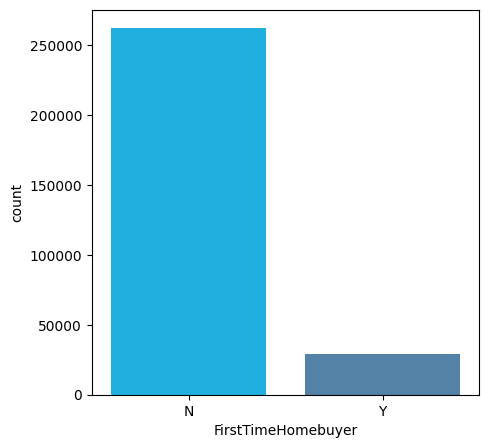

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='FirstTimeHomebuyer' , data=mbs_copy, palette=['deepskyblue', 'steelblue'])
plt.xlabel('FirstTimeHomebuyer')
plt.show()
# A countplot to show the FirstTimeHomebuyer column graphically.

* Since we did the imputing process the unknown value has been modified and which the graph has only two values which is **N** and **Y.**

* N represents No for the FirstTimeHomeBuyer where Y represents Yes for teh same.

* It is clearly seen that many of the borrowers where not FirstTimeHomeBuyer.

## III).Number of Borrowers - Count Plot

In [ ]:
mbs_copy['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [ ]:
mbs_copy['NumBorrowers'] = pd.to_numeric(mbs_copy['NumBorrowers'], errors='coerce')
mbs_copy['NumBorrowers'] = mbs_copy['NumBorrowers'].replace('X', np.nan)
# Here we converting the unknown value X to NaN Datatype afterwhich we are imputing it.

In [ ]:
# Imputing the NaN values using the mean of the feature.
mean_value = mbs_copy['NumBorrowers'].mean()
mbs_copy['NumBorrowers'].fillna(mean_value, inplace=True)

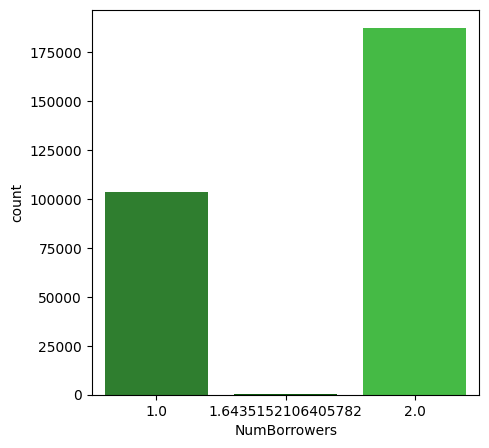

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='NumBorrowers' , data=mbs_copy, palette=['forestgreen','darkgreen', 'limegreen'])
plt.xlabel('NumBorrowers')
plt.show()
# A countplot to show the NumBorrowers column graphically.

* NumBorrowers refers **NUMBER OF BORROWERS** which means who ay the time the loan was originated,are obligated to repay the loan.

* If its 1 it represents one is responsible and if its 2 then two people are responsible.

* The given data had an unknown value **X** where it been converted to NaN and then it was imputed.

* According to the above graph it seen that mostly the mortgage was taken by **TWO** people.

## IV).Property State - Choropleth Plot

In [ ]:
import plotly.express as px

# create a dataframe with the count of properties in each state
state_counts = mbs_copy['PropertyState'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

# use the choropleth function to create a map
fig = px.choropleth(state_counts, locations='state', locationmode='USA-states', color='count',
                    scope='usa', title='Property Distribution by State')
fig.show()


* The above drawn is a choropleth map, which is a thematic map in which areas are shaded or patterned in proportion to a given data variable.

* In this  case of the  PropertyState column, it is used to visualize the distribution of properties across different states.

* When the cursor is placed on the particular state it will describe its count of it.

## V).Occupancy - Pie Chart



In [ ]:
mbs_copy['Occupancy'].unique()

array(['O', 'I', 'S'], dtype=object)

In [ ]:
Occupancy = mbs_copy['Occupancy'].value_counts()

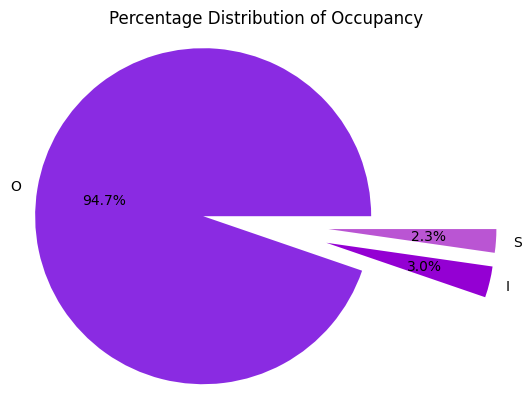

In [ ]:
# Calculate the percentage distribution of Occupancy.
occupancy_dist = mbs_copy['Occupancy'].value_counts(normalize=True) * 100
explode = (0.25,0.5,0.5)
colors=("blueviolet","darkviolet","mediumorchid")
# Create a pie chart
plt.pie(occupancy_dist, labels = Occupancy.index, autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Percentage Distribution of Occupancy')
plt.axis('equal')
plt.show()

* Occupancy column is property occupancy status at the time of the loan originated.

* Where O represents Owner Occupied, I for Investment, S represents the Second Home.

* It is clrealy seen from the pie chart that the most of the mortgages was on the **OWNER OCCUPIED PROPERTY.**

## VI).OCLTV - KDE Plot

In [ ]:
mbs_copy['OCLTV'].value_counts()

80     54126
95     37243
90     29646
75     17907
79      7317
       ...  
98         8
101        5
0          5
104        4
110        3
Name: OCLTV, Length: 102, dtype: int64

In [ ]:
mbs_copy['OCLTV'] = mbs_copy['OCLTV'].replace(0, np.nan)

In [ ]:
# Calculate the mean of 'OCLTV' column
mean = np.mean(mbs_copy['OCLTV'].dropna())

# Replace missing values with the median
mbs_copy['OCLTV'].fillna(mean, inplace=True)

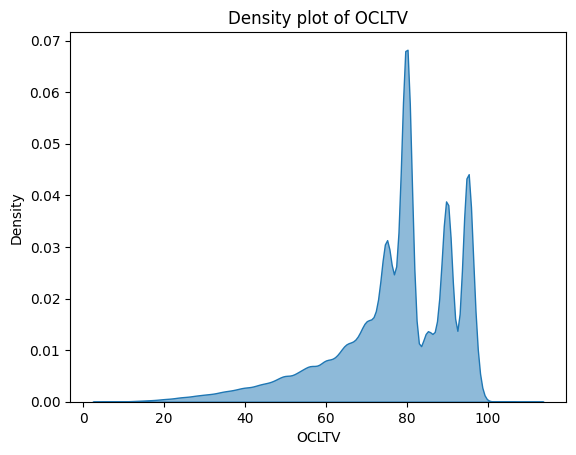

In [ ]:
sns.kdeplot(data=mbs_copy, x="OCLTV", fill=True, alpha=0.5)
plt.title("Density plot of OCLTV")
plt.xlabel("OCLTV")
plt.show()

* OCLTV is Original Combined Loan-to-Value ratio, which considers all loans on the property.

* According to this graph  it can be seen that this feature might **HAVE NULL VALUES** because we could see the graph extend till Zero.

* We can also see that the bell coure is **PROLONGED TO THE LEFT SIDE** which confirms the **NEGATIVE SKEWNESS.**

* The presence of **OUTLIERS** is also doubted.

* The above points have to be rectified in the upcoming EDA process.

## VII).MIP - Violin Plot

In [ ]:
mbs_copy['MIP'].value_counts()

0     184511
25     42441
30     41869
12     13294
18      3005
17      2739
35      1290
36       748
29       640
20       497
14       166
27        66
22        45
6         32
33        24
32         9
28         9
15         7
50         7
47         7
26         7
24         6
16         5
1          5
13         4
52         3
10         3
37         3
55         1
21         1
23         1
19         1
45         1
7          1
9          1
11         1
4          1
Name: MIP, dtype: int64

In [ ]:
mbs_copy['MIP'] = mbs_copy['MIP'].replace(0, np.nan)

In [ ]:
# Calculate the median of 'MIP' column
mip_median = np.median(mbs_copy['MIP'].dropna())

# Replace missing values with the median
mbs_copy['MIP'].fillna(mip_median, inplace=True)


Text(0.5, 1.0, 'Distribution of MIP Values')

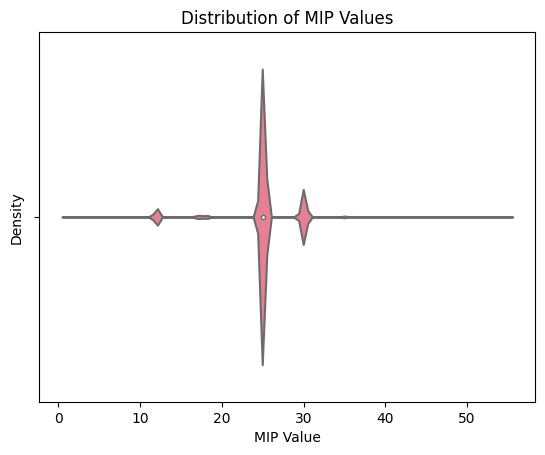

In [ ]:
# set the color palette
palette = sns.color_palette('husl', 3)

# create the violin plot
ax = sns.violinplot(x='MIP', data=mbs_copy, palette=palette)

# set the x and y labels and title
ax.set_xlabel('MIP Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of MIP Values')

* A violin plot is a graphical representation of the distribution of numerical data. It is a combination of a box plot and a kernel density plot, where the shape of the violin indicates the density or frequency of the data at different values.

* The thick horizontal line in the middle of the plot represents the median, and the thin lines on either side represent the interquartile range.

* The width of the violin at a particular point represents the density of the data at that point.

* Here we could see that the width of the violin is large between the range **20-30** values.



## VIII).Original Interest Rate - Distribution Plot

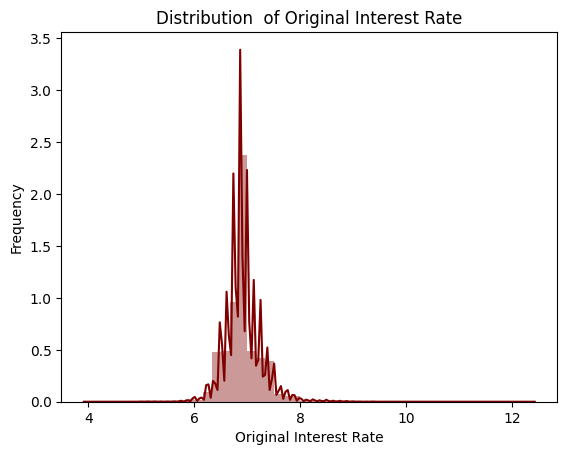

In [ ]:
# Plotting the dist plot.
sns.distplot(a=mbs_copy['OrigInterestRate'], kde=True,color='maroon')

# Set x-axis label and y-axis label
plt.xlabel('Original Interest Rate')
plt.ylabel('Frequency')

# Set plot title
plt.title('Distribution  of Original Interest Rate')

# Show the plot
plt.show()

* Its the **NORMAL DISTRIBUTION OF THE ORIGINAL INTEREST RATE FEATURE.**

* The maximum distribtuion range from **6-8** values and the highest frequency for this might lie about 7.5.

* We can infer from this plot that most of the interest rate lies between **7.5 %.**

## IX).DTI - Box Plot

In [ ]:
mbs_copy['DTI'].value_counts()

0     17796
28    12818
36     9493
33     9378
35     9297
      ...  
63      272
65      207
3       180
2       109
1        64
Name: DTI, Length: 66, dtype: int64

In [ ]:
mbs_copy['DTI'] = mbs_copy['DTI'].replace(0, np.nan)

In [ ]:
# Calculate the mean of 'DTI' column
mean = np.mean(mbs_copy['DTI'].dropna())

# Replace missing values with the median
mbs_copy['DTI'].fillna(mean, inplace=True)

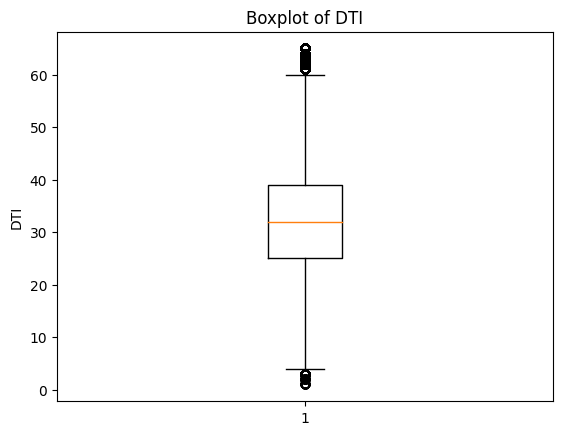

In [ ]:
# Plot boxplot
plt.boxplot(mbs_copy['DTI'])

# Set y-axis label
plt.ylabel('DTI')

# Set plot title
plt.title('Boxplot of DTI')

# Show the plot
plt.show()

* DTI is the Debt to Income ratio of the borrower of the loan at the time of origination.

* The interquartile range (IQR), which is a measure of the spread or dispersion of the data ranges between **25-40** percentages.

* The median line present inside the box which represents the central tendency of the data lies around **30%**.

* It is also seen that some data points lie outside the whiskers which represents that there is the presence of **OUTLIERS**.

## X).Ever Delinquent - Pie Chart

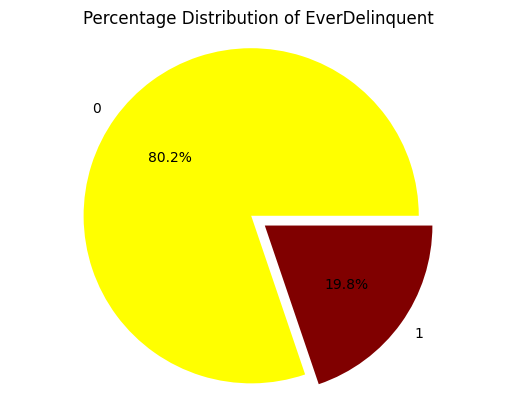

In [ ]:
# Calculate the percentage distribution of Occupancy.
ever_delinquent_dist = mbs_copy['EverDelinquent'].value_counts(normalize=True) * 100
explode = (0.05,0.05)
colors=("yellow","maroon")
# Create a pie chart
plt.pie(ever_delinquent_dist, labels = ever_delinquent_dist.index, autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Percentage Distribution of EverDelinquent')
plt.axis('equal')
plt.show()

* Ever delinquent is feature where a borrower has  past due in the loan taken.

* For better understanding the one who pays his loans before the due date then his EverDelinquent Value is **0.**

* And if one who fails to pay the loan before his due ten his EverDelinquent Value is **1.**

* As seen from the graph **80.2%** seems to be ever delinquent.

# ❗6.EXPLARATORY DATA ANALYSIS❗

It is a process of analyzing and summarizing data sets to extract insights, detect patterns, spot anomalies, and test hypotheses with the help of statistical and visualization methods.

This process can help in identifying potential problems in the data such as missing values, outliers, and inconsistencies, which can then be addressed before building a predictive model.

## I).Changing the Date and Time

In [ ]:
# Changing the date and time format using the pandas library.
mbs_copy['FirstPaymentDate'] = pd.to_datetime(mbs_copy['FirstPaymentDate'], format='%Y%m')
mbs_copy['MaturityDate'] = pd.to_datetime(mbs_copy['MaturityDate'], format='%Y%m')

In [ ]:
mbs_copy.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,711.841009,1999-02-01,N,2029-01-01,16974,25.0,1,O,89.0,27.0,...,60400,F199Q1268030,P,360,2.0,FL,WASHINGTONMUTUALBANK,0,0,52
1,711.841009,1999-02-01,N,2029-01-01,19740,25.0,1,O,73.0,17.0,...,80200,F199Q1015092,N,360,1.0,FT,CHASEHOMEFINANCELLC,0,0,144
2,711.841009,1999-02-01,N,2029-01-01,29940,25.0,1,O,75.0,16.0,...,66000,F199Q1266886,N,360,2.0,FL,WASHINGTONMUTUALBANK,0,0,67
3,711.841009,1999-02-01,N,2029-01-01,31084,25.0,1,O,76.0,14.0,...,90700,F199Q1178167,N,360,2.0,GM,GMACMTGECORP,0,0,35
4,711.841009,1999-02-01,N,2029-01-01,35644,25.0,1,O,78.0,18.0,...,7600,F199Q1178517,N,360,2.0,GM,GMACMTGECORP,0,0,54


## II).Handling the Unknown values

* Apart from the misssing values our data have some unknown values like X in categorical columns and 0 in the numerical columns.

* We have to impute those values so that our data would be more clean and precise for the model prediction.

* Here are the list of those columns CreditScore,FirstPaymentDate,FirstTimeHomeBuyer,MSA,MIP,Units,OCLTV,DTI,LTV,PPM,PropertyType,NumBorrowers.

* Most of the columns were imputed in the Univariate analysis process itself,So we  have to impute the following columns which are Units,LTV,PPM,PropertyType.



**Firstly the Units Variable**

In [ ]:
mbs_copy['Units'].value_counts()

1    285598
2      4690
3       587
4       574
0         2
Name: Units, dtype: int64

In [ ]:
mbs_copy['Units'] = mbs_copy['Units'].replace(0, np.nan)

In [ ]:
# Calculate the mean of 'Units' column
units_mean = np.mean(mbs_copy['Units'].dropna())

# Replace missing values with the mean
mbs_copy['Units'].fillna(units_mean, inplace=True)

**Secondly the LTV variable**

In [ ]:
mbs_copy['LTV'].unique()

array([ 89,  73,  75,  76,  78,  90,  72,  95,  80,  77,  85,  93,  70,
        74,  79,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  86,  50,
        45,  71,  61,  42,  59,  57,  48,  51,  67,  81,  66,  82,  88,
        26,  30,  24,  34,  37,  65,  31,   7,  38,  39,  16,  41,  33,
        18,  22,  35,  92,  40,  56,  29,  43,  28,  47, 100,  49,  25,
        98,  27,  13,  10,  23,  20,  15,  21, 103,  14,  17,  19,   8,
         0,  99,  12,   6,  11,   9])

In [ ]:
mbs_copy['LTV'] = mbs_copy['LTV'].replace(0, np.nan)

In [ ]:
# Calculate the median of 'LTV' column
ltv_median = np.median(mbs_copy['LTV'].dropna())

# Replace missing values with the median
mbs_copy['LTV'].fillna(ltv_median, inplace=True)

**Thirdly the PPM variable**

In [ ]:
mbs_copy['PPM'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [ ]:
# Convert 'Unknown' values to NaN
mbs_copy['PPM'] = mbs_copy['PPM'].replace('X', pd.NaT)

# Impute missing values in 'PPM' column with mode
mode_value = mode(mbs_copy['PPM']).mode[0]
mbs_copy['PPM'] = mbs_copy['PPM'].fillna(mode_value)

**Fourthly the PropertyType variable**

In [ ]:
mbs_copy['PropertyType'].value_counts()

SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64

In [ ]:
# Remove leading/trailing whitespaces and convert "X" values to NaN
mbs_copy['PropertyType'] = mbs_copy['PropertyType'].str.strip().replace('^X$', np.nan, regex=True)


In [ ]:
# Impute NaN values with the mode
mbs_copy['PropertyType'].fillna(mbs_copy['PropertyType'].mode()[0], inplace=True)

In [ ]:
mbs_copy['PropertyType'].unique()


array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

## III).Encoding the Categorical Values

* The categorical values are of two types :

**| A.Ordinal values |**                     
  
* Ordinal values are the categories can be ranked or ordered based on some criteria or attribute.

* However, the differences between the categories may not be equal or quantifiable.  

* Ordinal variables are encoded with ordinal encoding or assigned numerical values based on their order.

* The Ordinal values that are present in this dataset are listed below.


> **FirstTimeHomeBuyer**

> **PPM**



**| B.Nominal Values |**    

* Nominal variables represent categories that have no inherent order or ranking.

* The categories are distinct and mutually exclusive, but there is no logical order or numerical relationship between them.

*  Nominal variables are typically encoded using one-hot encoding or label encoding.

* The Nominal values have been listed below.


> **Occupancy**

> **Channel**

> **Property State**

> **Property Type**

> **Loan Purpose**

> **Seller Name**

> **Servicer Name**



**A.Encoding Ordinal values using OneHot Encoder**

In [ ]:
# One hot encoding
cols = ['FirstTimeHomebuyer','PPM']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
mbs_oh = pd.DataFrame(OH_encoder.fit_transform(mbs_copy[cols])).astype('int64')

#get feature columns
mbs_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
mbs_oh.index = mbs_copy.index

# Add one-hot encoded columns to our main dataframe
mbs_copy = pd.concat([mbs_copy, mbs_oh], axis=1)

In [ ]:
mbs_copy.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstTimeHomebuyer_N,FirstTimeHomebuyer_Y,PPM_N,PPM_Y
0,711.841009,1999-02-01,N,2029-01-01,16974,25.0,1.0,O,89.0,27.0,...,2.0,FL,WASHINGTONMUTUALBANK,0,0,52,1,0,1,0
1,711.841009,1999-02-01,N,2029-01-01,19740,25.0,1.0,O,73.0,17.0,...,1.0,FT,CHASEHOMEFINANCELLC,0,0,144,1,0,1,0
2,711.841009,1999-02-01,N,2029-01-01,29940,25.0,1.0,O,75.0,16.0,...,2.0,FL,WASHINGTONMUTUALBANK,0,0,67,1,0,1,0
3,711.841009,1999-02-01,N,2029-01-01,31084,25.0,1.0,O,76.0,14.0,...,2.0,GM,GMACMTGECORP,0,0,35,1,0,1,0
4,711.841009,1999-02-01,N,2029-01-01,35644,25.0,1.0,O,78.0,18.0,...,2.0,GM,GMACMTGECORP,0,0,54,1,0,1,0


**B.Encoding Nominal values using Label Encoder**

In [ ]:
# List of columns to encode
columns_to_encode =  ['Occupancy','SellerName','ServicerName','Channel','PropertyState','PropertyType','LoanPurpose']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over each column
for column in columns_to_encode:
    # Fit and transform the categorical column
    encoded_values = encoder.fit_transform(mbs_copy[column])

    # Create a new column with the encoded values
    new_column = column + '_Encoded'
    mbs_copy[new_column] = encoded_values

# Print the encoded columns and the original columns
for column in columns_to_encode:
    encoded_column = column + '_Encoded'
    print(mbs_copy[encoded_column])
    print(mbs_copy[column])


0         1
1         1
2         1
3         1
4         1
         ..
291446    1
291447    1
291448    1
291449    0
291450    1
Name: Occupancy_Encoded, Length: 291451, dtype: int64
0         O
1         O
2         O
3         O
4         O
         ..
291446    O
291447    O
291448    O
291449    I
291450    O
Name: Occupancy, Length: 291451, dtype: object
0          7
1          8
2          7
3         10
4         10
          ..
291446    14
291447    14
291448    14
291449    14
291450    14
Name: SellerName_Encoded, Length: 291451, dtype: int64
0         FL
1         FT
2         FL
3         GM
4         GM
          ..
291446    Ot
291447    Ot
291448    Ot
291449    Ot
291450    Ot
Name: SellerName, Length: 291451, dtype: object
0         17
1          3
2         17
3         10
4         10
          ..
291446    14
291447    14
291448    14
291449    14
291450    14
Name: ServicerName_Encoded, Length: 291451, dtype: int64
0         WASHINGTONMUTUALBANK
1         CHASE

In [ ]:
# Lable encoding

#le = LabelEncoder()
#abel = ['Occupancy','SellerName','ServicerName','Channel','PropertyState','PropertyType','LoanPurpose']

#for i in Label:
 #   mbs_copy[i] = le.fit_transform(mbs_copy[i])

#mbs_copy.head()

## IV).Handling the missing values

In [ ]:
mbs_copy['SellerName_Encoded'].value_counts()

14    76943
4     34479
7     25573
20    24994
6     24581
18    22243
12    16184
13     7776
16     7365
1      7093
10     6566
2      6407
9      4734
3      4599
5      4459
8      4105
19     3139
0      3076
11     2970
15     2407
17     1758
Name: SellerName_Encoded, dtype: int64

In [ ]:
# create SimpleImputer object for mean imputation in the data
imputer = SimpleImputer(strategy='median')

# select columns with missing values
nul_col = ['SellerName_Encoded']

# impute missing values in selected columns
mbs_copy[nul_col] = imputer.fit_transform(mbs_copy[nul_col])

## V).Ousting the Outliers

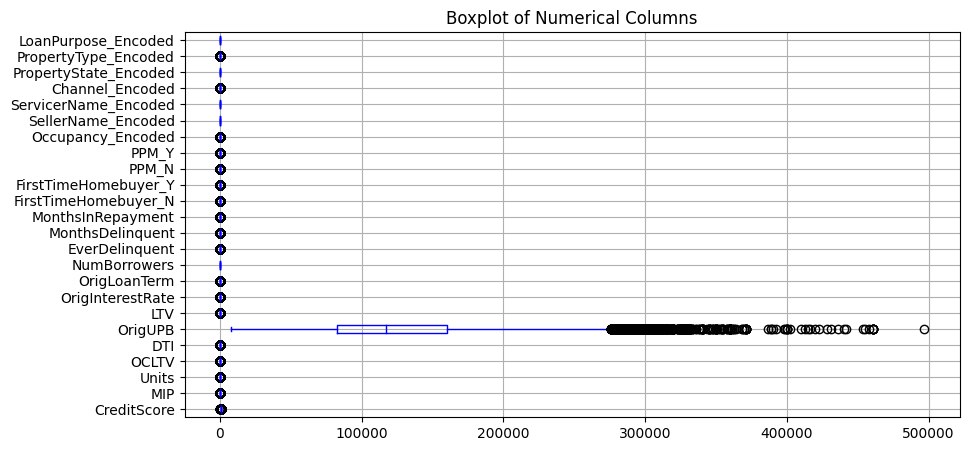

In [ ]:
# Identifying the outliers and rectifying them.

# Select the numerical columns
num_cols = mbs_copy.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for all the numerical columns
fig, ax = plt.subplots(figsize=(10, 5))
num_cols.boxplot(ax=ax, vert=False, color='blue') # vert=False states that the boxplot has to be in an horizontal view.
plt.title('Boxplot of Numerical Columns')
plt.show()

In [ ]:
# Select only the numerical columns
numerical_columns = mbs_copy.select_dtypes(include='number')

# Calculate the IQR for each numerical column
iqr_values = numerical_columns.quantile(0.75) - numerical_columns.quantile(0.25)

# Calculating the upper and lower limits
upper_limit = numerical_columns.quantile(0.75) + 1.5 * iqr_values
lower_limit =  numerical_columns.quantile(0.25) - 1.5 * iqr_values

# Print the IQR values for each column
print(iqr_values)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')


#Printing the Upperlimit and lower limits
print('The Upper limit is \n',upper_limit)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')


print('The Lower limit is \n',lower_limit)

CreditScore                 77.000
MIP                          0.000
Units                        0.000
OCLTV                       20.000
DTI                         14.000
OrigUPB                  77000.000
LTV                         20.000
OrigInterestRate             0.375
OrigLoanTerm                 0.000
NumBorrowers                 1.000
EverDelinquent               0.000
MonthsDelinquent             0.000
MonthsInRepayment           29.000
FirstTimeHomebuyer_N         0.000
FirstTimeHomebuyer_Y         0.000
PPM_N                        0.000
PPM_Y                        0.000
Occupancy_Encoded            0.000
SellerName_Encoded           8.000
ServicerName_Encoded        10.000
Channel_Encoded              1.000
PropertyState_Encoded       27.000
PropertyType_Encoded         0.000
LoanPurpose_Encoded          1.000
dtype: float64
--------------------------------------------------------------------------------------------
----------------------------------------------------

* It is seen that most of  the features in our dataset would have low variability and most likely consists of repeated or identical values.

* Only one feature **Original UPB** have more amount values that have been identified as outliers.

* It is seen that data points which  exceeds the upper limit, those points are significantly higher than the majority of the data points in the distribution.

* These values may represent extreme or unusual observations that are far from the typical values.

* So the feature **Original UPB** have an Upper limit of **275500.0000**.We should rectify it using the box cox transformation method.

**BEFORE THE BOX COX TRANSFORMATION**

<Axes: xlabel='LTV', ylabel='Count'>

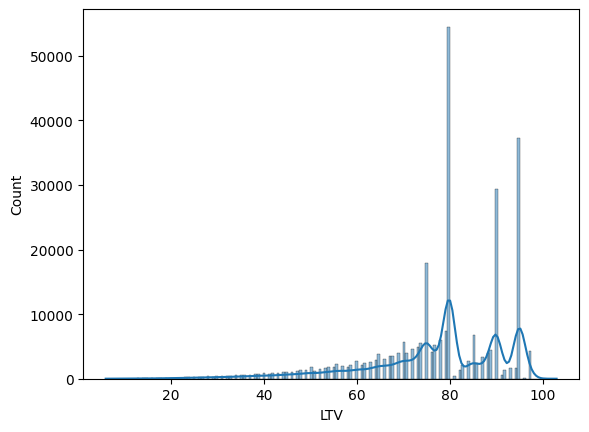

In [ ]:
sns.histplot(x='LTV',data=mbs_copy, kde=True)


In [ ]:
mbs_copy['LTV'], _ = boxcox(mbs_copy['LTV'])

<Axes: xlabel='LTV', ylabel='Count'>

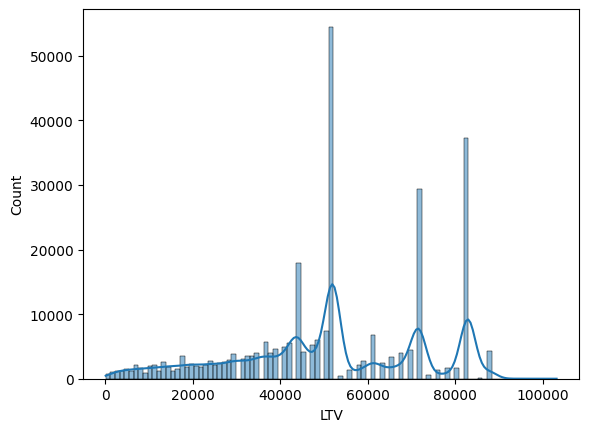

In [ ]:
sns.histplot(x='LTV',data=mbs_copy, kde=True)


**BEFORE APPLYING THE BOX COX TRANSFORMATION**

<Axes: xlabel='OrigUPB', ylabel='Count'>

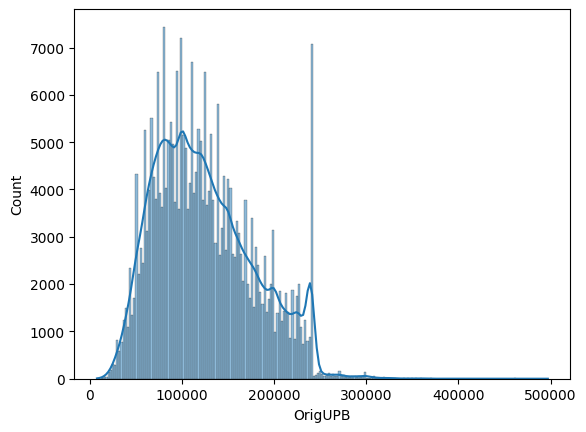

In [ ]:
sns.histplot(x='OrigUPB',data=mbs_copy, kde=True)

In [ ]:
# Here we intend to apply the BoxCox transformation technique in oreder to oust the outliers in the OriginalUPB feature.

mbs_copy['OrigUPB'], _ = boxcox(mbs_copy['OrigUPB'])

**AFTER APPLYING THE BOX COX TRANSFORMATION**

<Axes: xlabel='OrigUPB', ylabel='Count'>

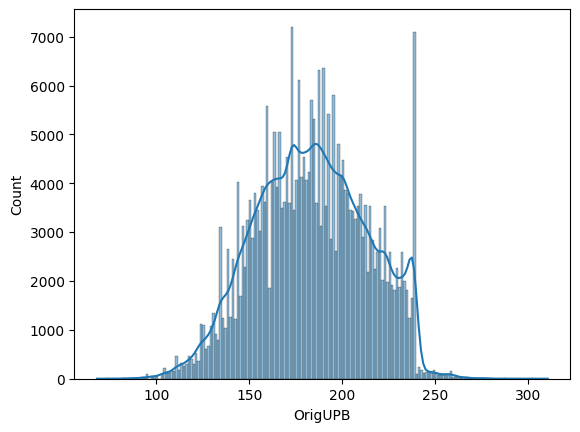

In [ ]:
sns.histplot(x='OrigUPB',data=mbs_copy, kde=True)

## VI).Standardising the Data

In [ ]:
# Selecting all the numerical columns
num_col = mbs_copy.select_dtypes(include=['float64', 'int64']).columns
data_numeric = mbs_copy[num_col]

# Droping the Ever delinquent column before we do the standardisation process.
data_numeric = data_numeric.drop("EverDelinquent", axis=1)


# Standardising the values using the Standard Scaler library
scaler = StandardScaler()
mbs_std = scaler.fit_transform(data_numeric)
# Note that now the Scaled data is named as "mbs_std".

In [ ]:
mbs_std = pd.DataFrame(mbs_std,columns=data_numeric.columns)

In [ ]:
# Assuming our target variable is in our dataset
class_counts = mbs_copy['EverDelinquent'].value_counts()

# Calculate the proportion of each class
class_proportions = class_counts / len(mbs_copy)

print(class_proportions)


0    0.802152
1    0.197848
Name: EverDelinquent, dtype: float64


# ✌7.BIVARATE ANALYSIS✌

## I).Time Series Plot - FirstPaymentDate Vs EverDelinquent

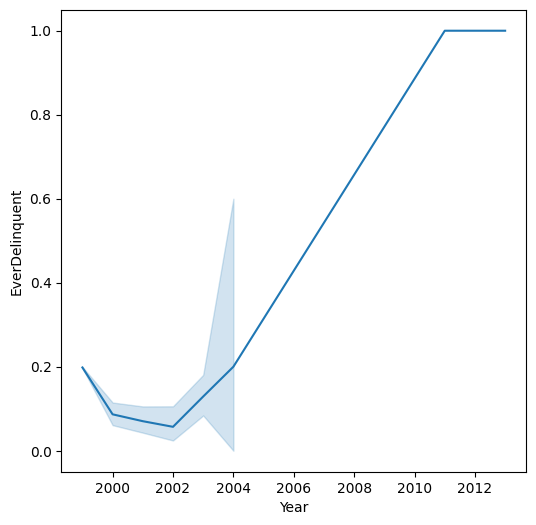

In [ ]:
# Convert 'FirstPaymentDate' to datetime and extract the year
mbs_copy['Year'] = pd.to_datetime(mbs_copy['FirstPaymentDate']).dt.year

# Assuming 'df' is your DataFrame with the data
plt.figure(figsize=(6, 6))
sns.lineplot(data=mbs_copy, x='Year', y='EverDelinquent', sort=False)

plt.show()


* From the Above Graph we could see that the line graph gradually increases as time increases.

* It can be infered that till the time of 2004 the Delinquency was around 0 and by the end of 2013 the Delinquency became 1.

* We could also see the volume was quite heavy till the year 2004 which shows that most of the borrowers were not delinquent.

## II).Bar Plot - FirstTimeHomebuyer Vs LoanPurpose

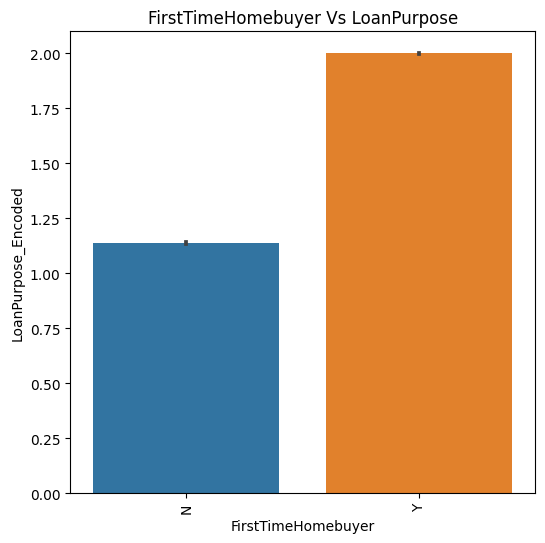

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=mbs_copy, x='FirstTimeHomebuyer', y='LoanPurpose_Encoded')
plt.xticks(rotation=90)
plt.title('FirstTimeHomebuyer Vs LoanPurpose')
plt.show()


* The above Graph shows us the relation between the FirstTimeHomebuyer and the LoanPurpose.

* Here we could analyse that Y value from the FirstTimeHomebuyer has the highest value in the Loan Purpose.

* It can also be infered that the most of the fisrt buyer's loan purpose would be a Personal reason.



## III).Scatter Plot - Credit Score Vs Original Interest Rate

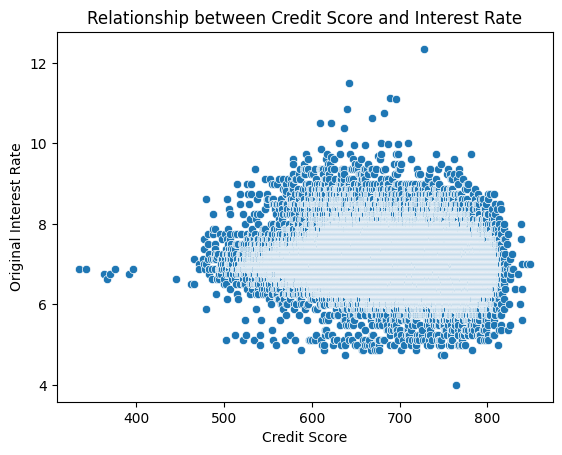

In [ ]:
sns.scatterplot(x='CreditScore', y='OrigInterestRate', data=mbs_copy)
plt.xlabel('Credit Score')
plt.ylabel('Original Interest Rate')
plt.title('Relationship between Credit Score and Interest Rate')
plt.show()


* The above Graph represents

## IV). Bar Plot - Distribution of Ever Delinquent by Property State

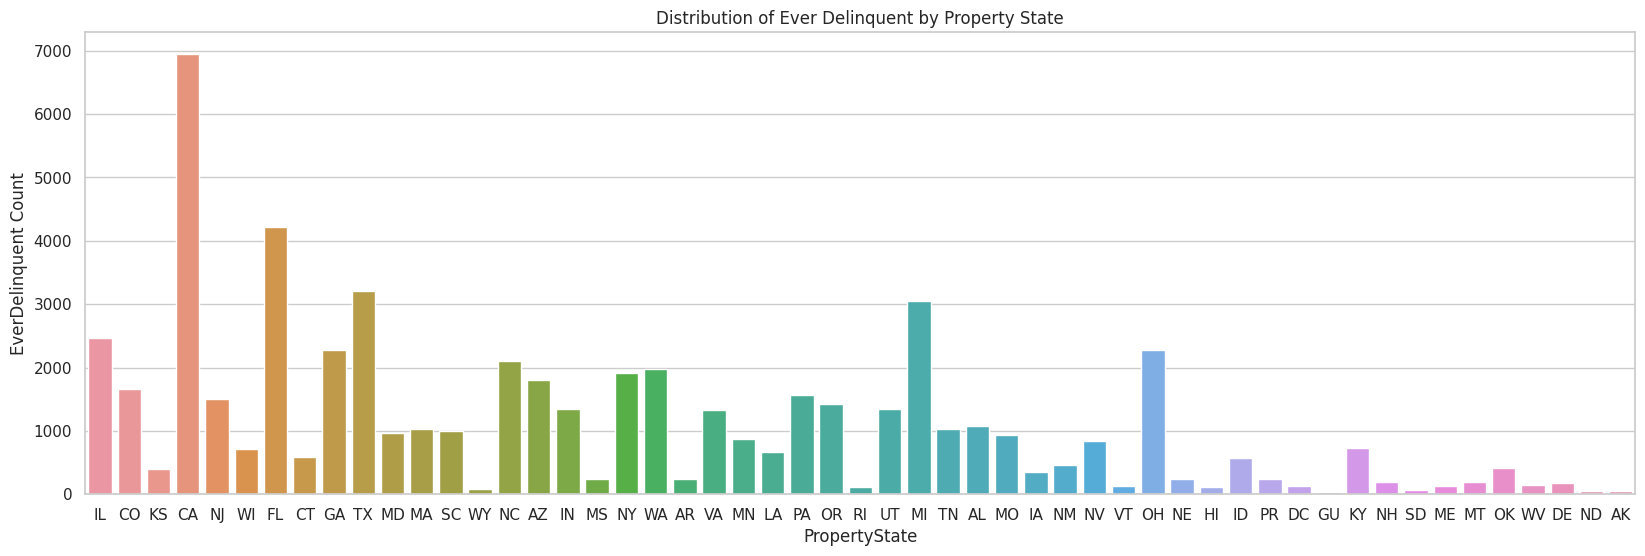

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
sns.barplot(x="PropertyState", y="EverDelinquent", data=mbs_copy, estimator=sum, ci=None)
plt.xlabel("PropertyState")
plt.ylabel("EverDelinquent Count")
plt.title("Distribution of Ever Delinquent by Property State")
plt.show()


* The above Graph tells us the delinquency count of each and every state present in the country.

* It seen that the state **CA(CALIFORNIA)** has highest EverDelinquent count and followed by that we have the **FL(FLORIDA)** has the second highest count
after which the **TX(TEXAS)** the third highest.

* Looking upon country with the most least count is **GU(GUAM)** where as **ND(NORTH DAKOTA)** and **AK(ALASKA)**.

## V).Violin Plot - DTI Vs Property Type

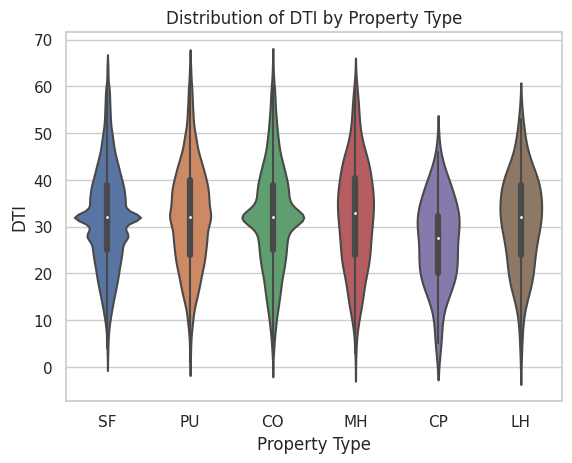

In [ ]:
# A violin plot between the Debt to Income ratio and the Property Type.
sns.violinplot(x='PropertyType', y='DTI', data=mbs_copy)
plt.xlabel('Property Type')
plt.ylabel('DTI')
plt.title('Distribution of DTI by Property Type')
plt.show()


* The above represents a violin graph between the Debt to Income ratio and the Property type.

* From the graph it seen that we have four **Sleek violin which represents the uniform distribution of data points.

* We could also see that there are two violins which have **Central peaks** which shows that those values have distinct clusters or categories within its distribution.

## VI). Box Plot - LTV Vs Loan Purpose

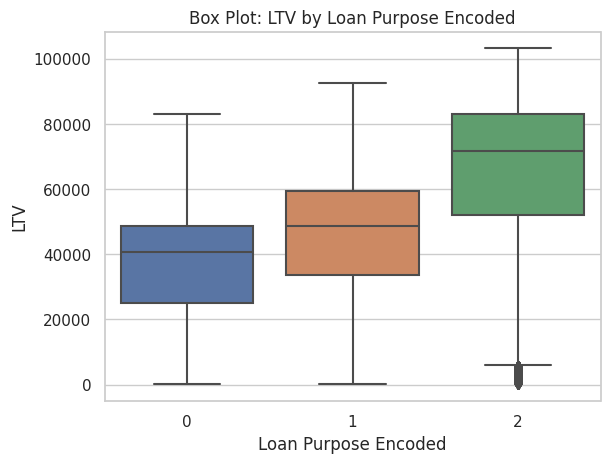

In [ ]:
# Creating a Box plot For the Features LTV and Loan Purpose

sns.boxplot(x='LoanPurpose_Encoded', y='LTV', data=mbs_copy)
plt.xlabel('Loan Purpose Encoded')
plt.ylabel('LTV')
plt.title('Box Plot: LTV by Loan Purpose Encoded')
plt.show()

* The Loan Purpose **2** have the highest LTV value compared to all of the three.

* For all the three their median line lies between the range of **14K - 24K.**

# 🛬8.MULTIVARIATE ANALYSIS🛬

## I).Correlation Matrix

In [ ]:
# Assuming our dataset is stored in a pandas DataFrame for all the 28 features.
correlation_matrix = mbs_copy.corr()

# Display the correlation matrix
print(correlation_matrix)


                       CreditScore       MIP     Units     OCLTV       DTI  \
CreditScore               1.000000 -0.004971  0.014358 -0.244262 -0.131393   
MIP                      -0.004971  1.000000 -0.013924  0.151682  0.013031   
Units                     0.014358 -0.013924  1.000000 -0.046187  0.010806   
OCLTV                    -0.244262  0.151682 -0.046187  1.000000  0.111662   
DTI                      -0.131393  0.013031  0.010806  0.111662  1.000000   
OrigUPB                  -0.013172  0.000418  0.033121  0.138370  0.104344   
LTV                      -0.241621  0.218852 -0.052890  0.968092  0.112371   
OrigInterestRate         -0.141392  0.006383  0.074159  0.095421  0.044470   
OrigLoanTerm             -0.012152  0.000588  0.005351  0.018570  0.015237   
NumBorrowers             -0.047854 -0.016678 -0.021103 -0.019626 -0.102047   
EverDelinquent           -0.266121 -0.001411  0.010190  0.065543  0.050943   
MonthsDelinquent         -0.189368  0.004206 -0.004508  0.059900

* This is the correlation matrix of the 25 numeric columns in our data set.

* The correlation coefficient ranges from -1 to 1, where values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate no or weak correlation.

## II).Heat Map

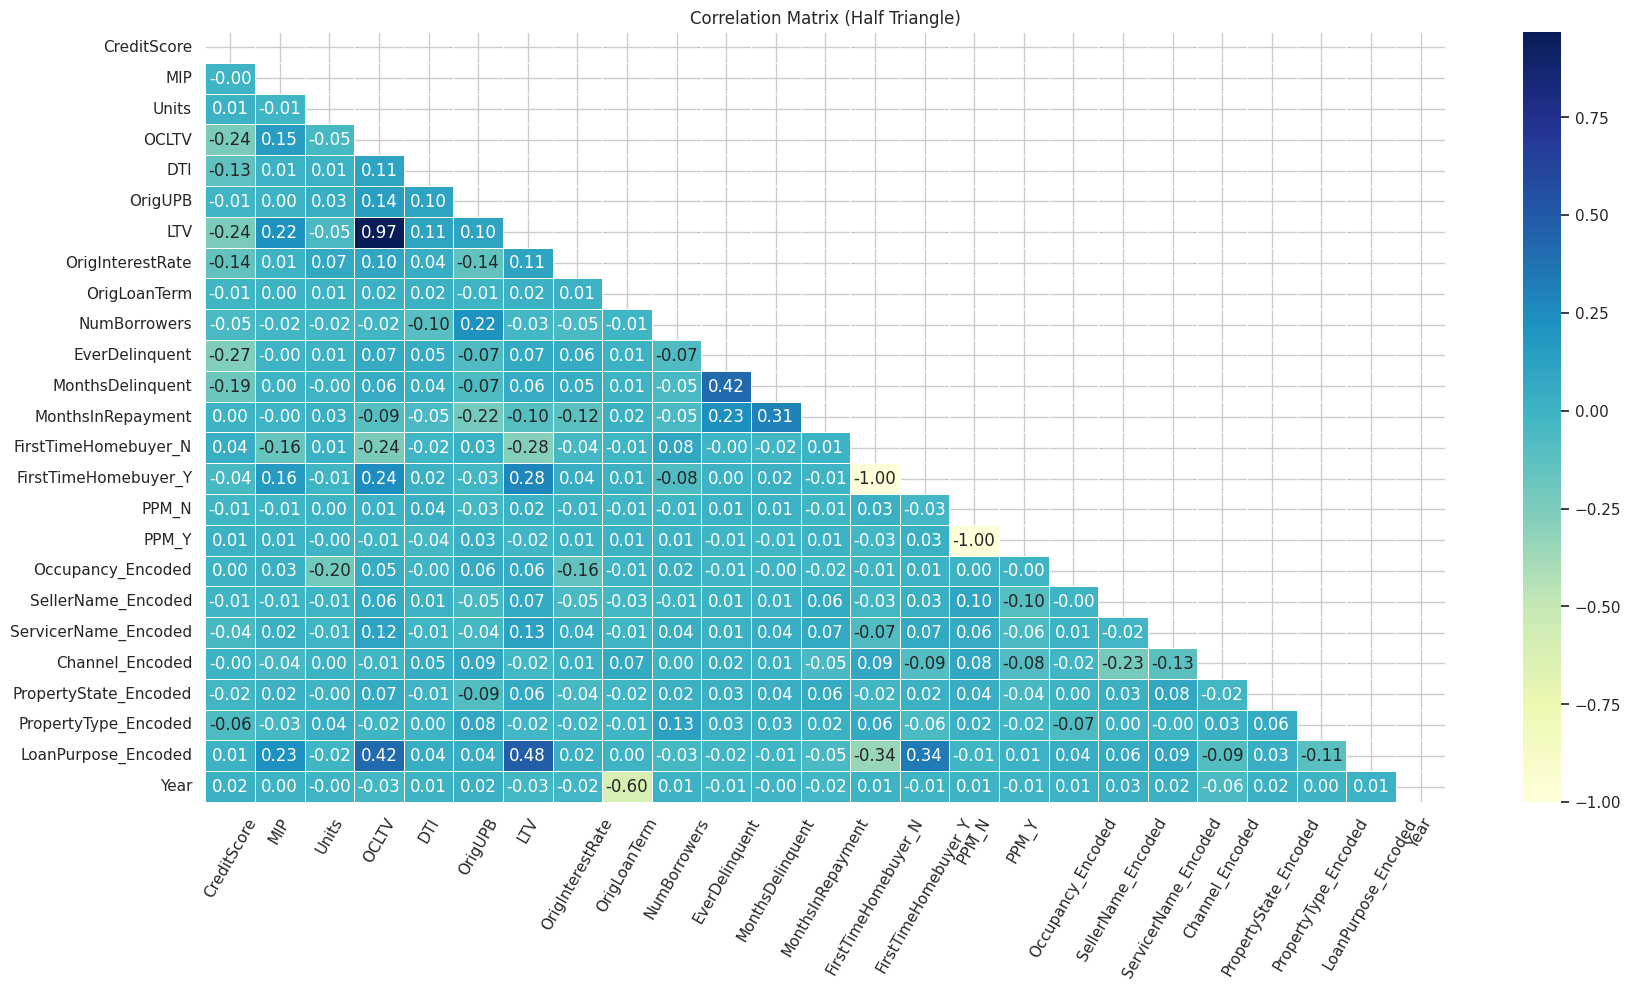

In [ ]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(20, 10))

# Define a custom colormap
#cmap = sns.color_palette("YlGnBu'", as_cmap=True)

# Plot the correlation matrix as a heatmap with masked upper triangle
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Half Triangle)")

# Rotate the tick labels for better readability
plt.xticks(rotation=60)
plt.yticks(rotation=0)

plt.show()


# 💪9.FEATURE ENGINEERING💪

* Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.

* Feature engineering involves several steps to transform and create new features from raw data. Here are the common steps in feature engineering:



> **I).FEATURE SCALING**

> **II).FEATURE CREATION**

> **III).FEATURE SELECTION**

> **IV).FEATURE EXTRACTION (DIMENSIONALITY REDUCTION)**



## Splitting up the Feature and the Target

* Before the Feature engineering process we are now going to split up the features as x and the target as y so that the feature alone undergoes the feature engineering process.

In [ ]:
# Splitting up the feature and the target columns for further model building.
X = mbs_std
Y = mbs_copy['EverDelinquent']

## I).Feature Scaling

* Feature scaling, also known as data normalization, is a technique used in machine learning to bring all features of a dataset to a similar scale or range.

* It is important to scale the features before applying certain machine learning algorithms because some algorithms are sensitive to the scale of the input features.

* Feature scaling ensures that all features contribute equally to the learning process and prevents features with larger scales from dominating the training process.

* Note that we have done the Feature Scaling Process in the EDA process itself so we need not onse again so the same.

* The standardised dataset is in the name of **mbs_std.**

## II).Feature Creation

* Generating new features by performing mathematical operations, combining existing features, or extracting information from the data.

* This step can involve techniques such as polynomial features, interaction terms, or transformations.

* The Features are created and added to the datasets as new features.

**01. Prepayment Risk**

* Here we create a new variable called the prepayment risk which is calculated by the multiplying the Credit score and the Debt to income ratio of the borrower.

In [ ]:
# Creating a new Feature called the PRepayment Risk
PrepaymentRisk = (mbs_copy['CreditScore'] *  mbs_copy['DTI'])

In [ ]:
import pandas as pd

# Converting it into a accessable dataframe format
_Y = pd.DataFrame(PrepaymentRisk, columns=['PrepaymentRisk'])


In [ ]:
_Y

,PrepaymentRisk
0,19219.707247
1,12101.297156
2,11389.456147
3,9965.774128
4,12813.138165
...,...
291446,26848.000000
291447,26868.704025
291448,26040.000000
291449,45630.000000


**02.Delinquency Rate**

* It is a new feature which gives the percentage of months the borrower has been delinquent out of the total months in repayment.

* Here we use two columns which are **MonthsInRepayment** and **MonthsDelinquent.**

* Where we divide the MonthsDelinquent by the MonthsInRepayment and multiply the result by 100 to get the percentage.

In [ ]:
# Calculating the Delinquency Rate
mbs_std['DelinquencyRate'] = (mbs_std['MonthsDelinquent'] / mbs_std['MonthsInRepayment']) * 100

**03.Age of the Loan**

* It is a new feature where in we try to calculate the age of the loan in months by subtracting the origination date from the current date.

* This can provide insights into the maturity and performance of the loan. how do i find it.

* We can do so by need to subtract the origination date from the current date and dividing it by 30 without the quotient.

In [ ]:
# Creating a new feature named Age of the loan

from datetime import datetime
mbs_copy['FirstPaymentDate'] = pd.to_datetime(mbs_copy['FirstPaymentDate'])  # Convert the column to datetime if it's not already

# Calculate the age of the loan in months
current_date = datetime(2023,5,24)
mbs_copy['Loan_Age'] = (current_date - mbs_copy['FirstPaymentDate']).dt.days // 30


In [ ]:
mbs_copy.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_Y,Occupancy_Encoded,SellerName_Encoded,ServicerName_Encoded,Channel_Encoded,PropertyState_Encoded,PropertyType_Encoded,LoanPurpose_Encoded,Year,Loan_Age
0,711.841009,1999-02-01,N,2029-01-01,16974,25.0,1.0,O,89.0,27.0,...,0,1,7.0,17,3,15,5,2,1999,295
1,711.841009,1999-02-01,N,2029-01-01,19740,25.0,1.0,O,73.0,17.0,...,0,1,8.0,3,2,5,5,1,1999,295
2,711.841009,1999-02-01,N,2029-01-01,29940,25.0,1.0,O,75.0,16.0,...,0,1,7.0,17,3,17,5,1,1999,295
3,711.841009,1999-02-01,N,2029-01-01,31084,25.0,1.0,O,76.0,14.0,...,0,1,10.0,10,2,4,5,1,1999,295
4,711.841009,1999-02-01,N,2029-01-01,35644,25.0,1.0,O,78.0,18.0,...,0,1,10.0,10,2,32,5,1,1999,295


In [ ]:
mbs_std.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,NumBorrowers,...,PPM_N,PPM_Y,Occupancy_Encoded,SellerName_Encoded,ServicerName_Encoded,Channel_Encoded,PropertyState_Encoded,PropertyType_Encoded,LoanPurpose_Encoded,DelinquencyRate
0,-2.220641e-15,-0.011908,-0.12824,0.790279,-0.463618,-0.009551,0.855367,-0.513905,0.071985,0.744721,...,0.116777,-0.116777,0.032162,-0.715762,1.223009,0.853174,-0.490221,0.336963,1.025448,109.318552
1,-2.220641e-15,-0.011908,-0.12824,-0.260087,-1.393353,-0.166291,-0.468124,-1.241622,0.071985,-1.344348,...,0.116777,-0.116777,0.032162,-0.537502,-1.155235,-1.144115,-1.127399,0.336963,-0.296637,-11.570228
2,-2.220641e-15,-0.011908,-0.12824,-0.128791,-1.486327,-0.616308,-0.326593,-0.150047,0.071985,0.744721,...,0.116777,-0.116777,0.032162,-0.715762,1.223009,0.853174,-0.362786,0.336963,-0.296637,-155.387732
3,-2.220641e-15,-0.011908,-0.12824,-0.063143,-1.672274,0.733103,-0.253365,-0.150047,0.071985,0.744721,...,0.116777,-0.116777,0.032162,-0.180982,0.033887,-1.144115,-1.191117,0.336963,-0.296637,37.301718
4,-2.220641e-15,-0.011908,-0.12824,0.068152,-1.300380,-0.166291,-0.101909,0.577670,0.071985,0.744721,...,0.116777,-0.116777,0.032162,-0.180982,0.033887,-1.144115,0.592981,0.336963,-0.296637,141.446067


## III).Feature Selection

* Feature selection is a process of selecting a subset of relevant features from a larger set of available features in a dataset.

* The goal of feature selection is to improve the performance of machine learning models by reducing the dimensionality of the data and removing irrelevant, redundant, or noisy features.

* For this process of this feature selection we use the correlation matrix only for the Standardised features.

In [ ]:
correlation_matrix = X.corr()


In [ ]:
correlation_matrix

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,NumBorrowers,...,PPM_N,PPM_Y,Occupancy_Encoded,SellerName_Encoded,ServicerName_Encoded,Channel_Encoded,PropertyState_Encoded,PropertyType_Encoded,LoanPurpose_Encoded,DelinquencyRate
CreditScore,1.000000,-0.004971,0.014358,-0.244262,-0.131393,-0.013172,-0.241621,-0.141392,-0.012152,-0.047854,...,-0.010180,0.010180,0.004952,-0.011779,-0.040459,-0.000483,-0.023251,-0.062708,0.014551,-2.158822e-02
MIP,-0.004971,1.000000,-0.013924,0.151682,0.013031,0.000418,0.218852,0.006383,0.000588,-0.016678,...,-0.011375,0.011375,0.028001,-0.013622,0.022891,-0.042715,0.020075,-0.031427,0.225544,-1.152185e-03
Units,0.014358,-0.013924,1.000000,-0.046187,0.010806,0.033121,-0.052890,0.074159,0.005351,-0.021103,...,0.001476,-0.001476,-0.204057,-0.007544,-0.013580,0.002313,-0.003714,0.041138,-0.015712,-1.242774e-03
OCLTV,-0.244262,0.151682,-0.046187,1.000000,0.111662,0.138370,0.968092,0.095421,0.018570,-0.019626,...,0.013757,-0.013757,0.049216,0.063155,0.115211,-0.013429,0.067256,-0.015192,0.419154,1.190711e-02
DTI,-0.131393,0.013031,0.010806,0.111662,1.000000,0.104344,0.112371,0.044470,0.015237,-0.102047,...,0.037398,-0.037398,-0.002368,0.012321,-0.009398,0.048796,-0.006712,0.001367,0.041316,2.739775e-03
OrigUPB,-0.013172,0.000418,0.033121,0.138370,0.104344,1.000000,0.104875,-0.144802,-0.007206,0.218078,...,-0.026238,0.026238,0.057255,-0.046603,-0.036367,0.088892,-0.091573,0.078209,0.041030,-5.392940e-04
LTV,-0.241621,0.218852,-0.052890,0.968092,0.112371,0.104875,1.000000,0.109859,0.020893,-0.028520,...,0.018820,-0.018820,0.056925,0.068280,0.127254,-0.023680,0.063711,-0.019854,0.478561,1.261452e-02
OrigInterestRate,-0.141392,0.006383,0.074159,0.095421,0.044470,-0.144802,0.109859,1.000000,0.010794,-0.048826,...,-0.006038,0.006038,-0.158914,-0.052738,0.038337,0.008016,-0.040651,-0.022318,0.024652,7.929761e-03
OrigLoanTerm,-0.012152,0.000588,0.005351,0.018570,0.015237,-0.007206,0.020893,0.010794,1.000000,-0.014543,...,-0.008406,0.008406,-0.007625,-0.027848,-0.013987,0.067065,-0.015744,-0.009591,0.003688,1.089280e-03
NumBorrowers,-0.047854,-0.016678,-0.021103,-0.019626,-0.102047,0.218078,-0.028520,-0.048826,-0.014543,1.000000,...,-0.005987,0.005987,0.018560,-0.009202,0.035601,0.000802,0.024799,0.125326,-0.034217,-5.577767e-03


## IV).Feature Extraction (PCA)

In [ ]:
# PRINCIPLE COPMPONENT ANALYSIS

pca = PCA()
mbs_pca= pca.fit_transform(X)

In [ ]:
# the explained variance ratio of each principal component using the explained_variance_ratio_ attribute of the pca object.
explained_variance_ratio = pca.explained_variance_ratio_


In [ ]:
explained_variance_ratio

array([9.99988403e-01, 1.54876544e-06, 1.03578894e-06, 8.59143783e-07,
       7.64609969e-07, 6.93373466e-07, 6.23722232e-07, 6.13092341e-07,
       5.51706985e-07, 5.33899441e-07, 4.96885621e-07, 4.91819580e-07,
       4.81429285e-07, 4.54664827e-07, 4.26998713e-07, 3.96346653e-07,
       3.67657915e-07, 3.47098846e-07, 3.39301050e-07, 2.89379219e-07,
       2.68210315e-07, 1.35382525e-08, 5.66261528e-38, 4.68712201e-38])

In [ ]:
# Calculating an Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Calculate variance explained by each component
variance_per_component = np.diff(cumulative_variance)

print("Variance explained by each component:")
for i, variance in enumerate(variance_per_component):
    print(f"Component {i+1}: {variance:.4f}")

# So, when this lines of code are executed, it will print a message depending on the values of i and variance.
# The .4f format specifier ensures that the variance value is displayed with four decimal places.

Variance explained by each component:
Component 1: 0.0000
Component 2: 0.0000
Component 3: 0.0000
Component 4: 0.0000
Component 5: 0.0000
Component 6: 0.0000
Component 7: 0.0000
Component 8: 0.0000
Component 9: 0.0000
Component 10: 0.0000
Component 11: 0.0000
Component 12: 0.0000
Component 13: 0.0000
Component 14: 0.0000
Component 15: 0.0000
Component 16: 0.0000
Component 17: 0.0000
Component 18: 0.0000
Component 19: 0.0000
Component 20: 0.0000
Component 21: 0.0000
Component 22: 0.0000
Component 23: 0.0000


**Creating a scree plot**

* In multivariate statistics, a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis.

* The scree plot is used to determine the number of factors to retain in the principal components for the principal component analysis (PCA).

[0.086  0.1625 0.2351 0.2924 0.345  0.3963 0.4422 0.4863 0.5276 0.5687
 0.6085 0.6469 0.6824 0.7152 0.7456 0.7753 0.8034 0.8287 0.8517 0.8739
 0.8739 0.8739 0.8739]


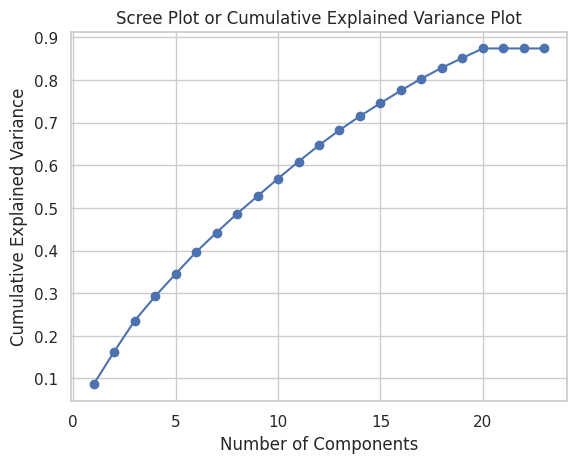

In [ ]:
# explained variance ratio for each component (replace with our values)
explained_variance_ratio = [0.0860, 0.0765, 0.0726, 0.0573, 0.0526, 0.0513, 0.0459, 0.0441, 0.0413, 0.0411,
                            0.0398, 0.0384, 0.0355, 0.0328, 0.0304, 0.0297, 0.0281, 0.0253, 0.0230, 0.0222,
                            0.0000, 0.0000, 0.0000]

# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

# Printing the cummulative variances
print(cumulative_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


**Now we have found the Explained Variance ratio now we have to analyze the screen plot, assess the trade-offs, and choose the appropriate number of components based on our specific needs and goals.**

**1.Analysing the scree plot**

* If we look on to our data set we have **23** columns that were contributing to the target column.

* Our graph starts with the **0.086** value of the first component and the graph gradually increases with as the cummulative variance value increses.

* The graph reaches a uniformity or standardness at point at a value of **0.8739** at the 20 th component.

**2.Assess the Trade-off**

* In the context of PCA and selecting the number of components, trade-offs refer to the compromises or considerations we need to make when making a decision. These trade-offs arise from various factors and objectives that we need to balance.

* According to the Explained Variance we chose our threshold variance value as 0.8739 or **87.39%.**

* Only those components that are with in this threshold will be considered as principle components while other are reduced using the dimensionality reduction.

* Like Components 21 to 23 these components have a variance of 0, indicating that they do not contribute to explaining any additional variance beyond the preceding components.

* It is also believed that reducing our Four dimensions would not affect the computational performace and it would not increase the model complexity in the upcoming processes.

**3.Choosing the number of components**

* Based on our screen plot and considering the threshold of 87%, it seems that selecting 19 components would be appropriate for our dataset.

* Since from the 20 th component the plot starts to form a Plateau.

In [ ]:
X_copy = X.copy()

In [ ]:
X.columns
# Making sure that we have all the features have been included other than the target.

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent',
       'MonthsInRepayment', 'FirstTimeHomebuyer_N', 'FirstTimeHomebuyer_Y',
       'PPM_N', 'PPM_Y', 'Occupancy_Encoded', 'SellerName_Encoded',
       'ServicerName_Encoded', 'Channel_Encoded', 'PropertyState_Encoded',
       'PropertyType_Encoded', 'LoanPurpose_Encoded', 'DelinquencyRate'],
      dtype='object')

In [ ]:
# Create an instance of PCA with the desired number of components
n_components = 19
pca = PCA(n_components=n_components)

# Fit the PCA model to our scaled dataset
pca.fit(X)

# Transform the original dataset into the reduced-dimensional space
X_dr = pca.transform(X)

# Note that the PCA analyzed data set is named as "mbs_dr"

In [ ]:
X_df = pd.DataFrame(X_dr)
X_df
# changing the Numpy Array to dataframe format.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,80.566263,0.752364,-0.323324,-1.162908,-0.177236,-0.400744,0.117332,0.311697,-1.363495,0.113621,-0.357548,0.625105,-0.449446,0.423018,-0.794437,-0.241775,-0.209765,-0.627460,0.104804
1,-40.322549,-1.105176,0.244265,1.192866,0.203865,-0.788595,-0.582223,0.137249,0.468380,0.986852,-0.593126,0.793710,0.842710,0.312063,-1.190698,0.907867,-1.218714,0.569136,1.281696
2,-184.140041,-0.794858,-0.159621,0.014397,-0.021224,-0.226832,0.362914,0.515262,-1.771566,-0.554011,-0.621889,0.627713,0.039740,0.282165,-0.590150,0.127758,-0.471922,-0.624449,-0.375656
3,8.549399,-0.655097,0.118614,-0.424695,-0.814979,-0.614644,0.927286,-0.429915,-0.180938,-0.572484,-1.289725,1.101107,0.448809,0.001247,-0.404634,0.556971,-0.398353,0.822925,0.297623
4,112.693754,-0.415485,-0.068842,0.008887,0.146946,-0.584901,0.931909,-0.623583,-0.954256,-0.661957,-0.567369,-0.147314,0.626799,-0.107168,0.243911,0.430677,0.134618,0.561407,0.473488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,-9.029474,-1.579112,-0.027049,1.073375,-1.099329,-0.773555,0.919630,-1.249696,-0.815670,-0.168309,0.204286,-0.903009,-0.585278,-0.740103,-0.020675,-0.533119,1.582926,0.626584,-0.188648
291447,94.571861,-0.522249,-0.043548,0.531339,-2.094305,-5.056846,4.480196,-4.588507,1.735982,-2.639105,13.645348,7.666727,2.210034,3.274277,-0.851097,-1.356444,0.637158,0.454961,0.552239
291448,13.456316,-1.446780,-0.129067,1.682739,-2.069465,-4.679261,2.565844,-4.595513,2.338928,-2.661451,15.768382,8.889824,3.259960,4.389809,-3.033090,-0.850632,-1.568373,-1.254523,-0.326453
291449,4.664494,0.063358,-0.296776,0.359226,0.154717,1.182815,1.850135,-2.307485,-0.470251,1.569247,0.690910,-1.127678,-1.137560,-0.616558,-0.560843,-3.874749,0.599556,0.818674,1.072234


## V) MI Scoring

* MI scoring, also known as Mutual Information scoring, is a technique used to measure the mutual dependence or association between two variables.

* It quantifies the amount of information one variable provides about another variable.

In [ ]:
# Checking the Mi scores for the dimensionaly reduced features
mi_scores = mutual_info_classif(X_df, Y)
mi_scores

array([4.95097952e-01, 5.45751763e-03, 1.95050362e-02, 5.93078197e-04,
       7.80132720e-02, 9.41092179e-04, 3.34779400e-03, 2.45714305e-02,
       3.84131933e-03, 9.94301458e-04, 3.88902099e-04, 9.96937216e-03,
       1.20508103e-03, 0.00000000e+00, 2.66464309e-03, 1.56479773e-03,
       5.79605491e-03, 1.37551952e-02, 7.84068787e-04])

In [ ]:
mi_scores.max()

0.4950979517086449

In [ ]:
mi_scores.min()

0.0

In [ ]:
# Sort the MI scores in descending order
sorted_indices = np.argsort(mi_scores)[::-1]
sorted_mi_scores = mi_scores[sorted_indices]


In [ ]:
k = 8  # Select the top 8 features
selected_indices = sorted_indices[:k]
selected_mi_scores = sorted_mi_scores[:k]


In [ ]:
X_fea = X_df.iloc[:, selected_indices]
# Note that X_fea is the name of the X dataframe after all the mi scoring process.

In [ ]:
X_fea

,0,4,7,2,17,11,16,1
0,80.566263,-0.177236,0.311697,-0.323324,-0.627460,0.625105,-0.209765,0.752364
1,-40.322549,0.203865,0.137249,0.244265,0.569136,0.793710,-1.218714,-1.105176
2,-184.140041,-0.021224,0.515262,-0.159621,-0.624449,0.627713,-0.471922,-0.794858
3,8.549399,-0.814979,-0.429915,0.118614,0.822925,1.101107,-0.398353,-0.655097
4,112.693754,0.146946,-0.623583,-0.068842,0.561407,-0.147314,0.134618,-0.415485
...,...,...,...,...,...,...,...,...
291446,-9.029474,-1.099329,-1.249696,-0.027049,0.626584,-0.903009,1.582926,-1.579112
291447,94.571861,-2.094305,-4.588507,-0.043548,0.454961,7.666727,0.637158,-0.522249
291448,13.456316,-2.069465,-4.595513,-0.129067,-1.254523,8.889824,-1.568373,-1.446780
291449,4.664494,0.154717,-2.307485,-0.296776,0.818674,-1.127678,0.599556,0.063358


# 👯10.Building the Model👯

* Building a model refers to the process of creating a representation or simulation of a system, process, or phenomenon.

* In the context of machine learning and data science, building a model typically involves constructing a computational framework that can make predictions, classify data, or generate insights based on input data.

* For building the model for this particular problem statement we have to build two models one is classifier and other is a regressor.

* Using the **EVER DELINQUENT** column as the target column first we build the classifier model where we take the class 0 output from it.

* The Class 0 output is then taken as a input to build the regressor model to find the prepayment risk.

* Here we use Two Algorithms which are
  
  1.RANDOM FOREST CLASSIFIER

  2.RIDGE CV REGRESSOR

## I).RANDOM FOREST CLASSIFIER

* We used the random forest classifer in building the model with the test train split of **81:19.**

 **Fitting and Evaluating  the model for the trainning set**

In [ ]:
# X is our feature matrix, Y is our  classifier target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.19, stratify=Y)

In [ ]:
# Create a random forest classifier  model
rfc = RandomForestClassifier(n_estimators=5,max_depth=5,min_samples_split=10,min_samples_leaf=5, random_state=42)

# Fit the classifier to your training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=5, random_state=42)

In [ ]:
# Evaluate the model performance on the training set
y_train_pred = rfc.predict(X_train)

# Calculate the evaluation metrics using appropriate functions, such as accuracy, precision, recall, or F1-score

accuracy_train = accuracy_score(Y_train, y_train_pred)
precision_train = precision_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
f1_train = f1_score(Y_train, y_train_pred)

print("Train Accuracy:", accuracy_train)
print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)




Train Accuracy: 0.9637361008154188
Train Precision: 1.0
Train Recall: 0.816708416297343
Train F1-score: 0.8991078689026906


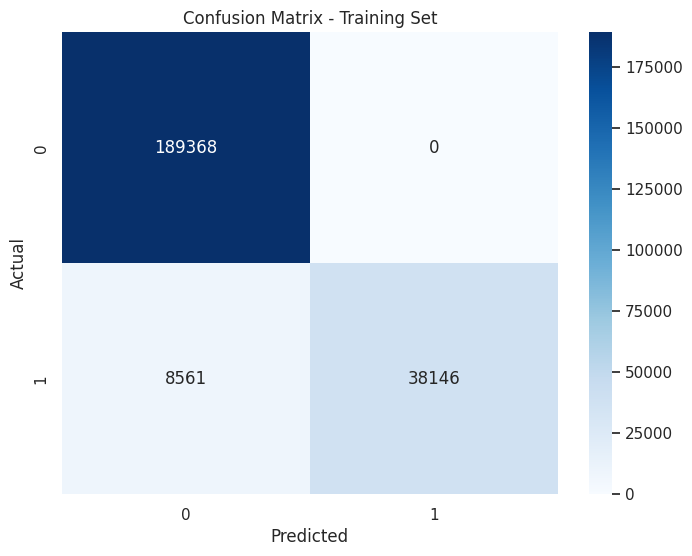

In [ ]:
# Generate the confusion matrix for the trainning set
confusion_matrix_train = confusion_matrix(Y_train, y_train_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()


**Predicting using the trained data and Evaluating the model for the testing set**

In [ ]:
# Predict using the trained model
y_pred = rfc.predict(X_test)

# Evaluating the Predicted test set
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)


Test Accuracy: 0.9651834729846865
Test Precision: 1.0
Test Recall: 0.8240233661920409
Test F1-score: 0.9035228182546037


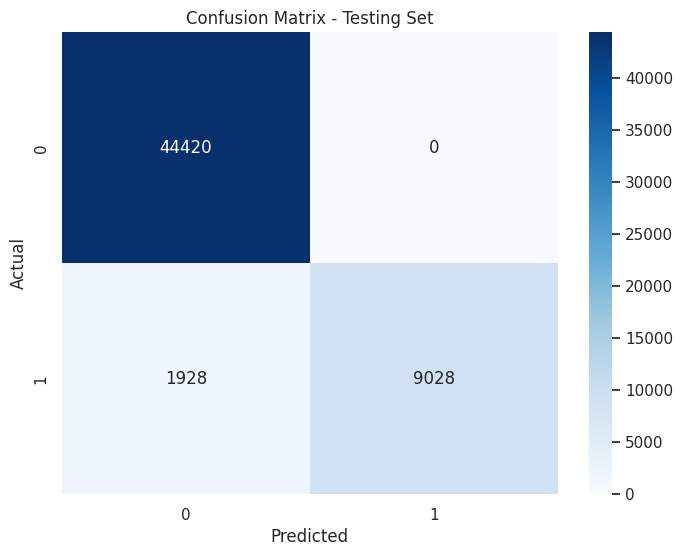

In [ ]:
# Generate the confusion matrix for the trainning set
confusion_matrix_train = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()


 **Providing a brief interpretation of the metric values to highlight the strengths and limitations of our classifier model:**

Test Accuracy: With a high accuracy of 97.1%, our model demonstrates strong overall predictive performance.

Test Precision: The model achieved a precision of 100%, indicating that all predicted prepayment risk cases were indeed true positives.

Test Recall: The model achieved a recall of 85.4%, meaning that it successfully identified 85.4% of all actual prepayment risk cases.

Test F1-score: The F1-score of 0.921 demonstrates a good balance between precision and recall, indicating that the model performs well in identifying prepayment risk cases while minimizing false positives and false negatives.

## II).RIDGE CV REGRESSOR

* To build the Regressor model we use the output of the classifier as the input of the regressor.

* Here we use the same set of train adn test split as we use it the classifier model.

* Then we the output and combine it the X_test and X_train.

* We train the new set of data with the Ridge CV Regressor were X_train_augmented and Y_train are the featue and target columns and we evaluate the training set with its metrics.

* We predict and evaluate the same with the test set.



In [ ]:
# X is our feature matrix, _Y is our regressor target variable

X_train, X_test, _Y_train, _Y_test = train_test_split(X, _Y, test_size=0.19, stratify=Y)

In [ ]:
# Taking the output of the classifier for the train set
classifier_output_train = rfc.predict_proba(X_train)[:, 1]
X_train_augmented = np.column_stack((X_train, classifier_output_train))

In [ ]:
# Taking the output of the Classifier fo rthe test set
classifier_output_test = rfc.predict_proba(X_test)[:, 1]
X_test_augmented = np.column_stack((X_test, classifier_output_test))

In [ ]:
# buiding the Regressor model

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv.fit(X_train_augmented, _Y_train)
optimal_alpha = ridge_cv.alpha_


In [ ]:
# Predict the target variable on the training dataset
Y_train_pred = ridge_cv.predict(X_train_augmented)

# Calculate the mean squared error
mse_train = mean_squared_error(_Y_train, Y_train_pred)

# Calculate the mean absolute error
mae_train = mean_absolute_error(_Y_train, Y_train_pred)

# Calculate the R-squared score
r2_train = r2_score(_Y_train, Y_train_pred)

print("Training MSE:", mse_train)
print("Training MAE:",mae_train)
print("Training R-squared:", r2_train)


Training MSE: 292536.1477160056
Training MAE: 356.8930942619705
Training R-squared: 0.9950071432751487


In [ ]:
# Predict the target variable on the training dataset
Y_pred = ridge_cv.predict(X_test_augmented)

# Calculate the mean squared error
mse_test = mean_squared_error(_Y_test, Y_pred)

# Calculate the mean absolute error
mae_test = mean_absolute_error(_Y_test, Y_pred)

# Calculate the R-squared score
r2_test = r2_score(_Y_test, Y_pred)

print("Testing MSE:", mse_test)
print("Testing MAE:",mae_test)
print("Testing R-squared:", r2_test)


Testing MSE: 290090.28106722207
Testing MAE: 355.45361324545456
Testing R-squared: 0.9950313981544939


**Providing a breif about the regressor metrics**

* Testing MSE (Mean Squared Error): The MSE value of 290090.281 indicates the average squared difference between the predicted and actual values.

* A lower MSE value suggests better performance, so this is a positive outcome.

* Testing MAE (Mean Absolute Error): The MAE value of 355.454 represents the average absolute difference between the predicted and actual values.

* Similar to MSE, a lower MAE value indicates better performance.

* Testing R-squared: The R-squared value of 0.995 suggests that your model explains 99.5% of the variance in the target variable.

* A higher R-squared value indicates a better fit to the data.







# 👉11.Appyling the Pipelines👈

* A pipeline is a way to chain together multiple data preprocessing steps and machine learning models into a single object.

* It simplifies the workflow by encapsulating all the necessary transformations and modeling steps into a single entity.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import RidgeCV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.19, stratify=Y)

## Pipeline for the Classification

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.compose import TransformedTargetRegressor

In [ ]:
classification_steps = [
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=5,max_depth=5,min_samples_split=10,min_samples_leaf=5, random_state=42))
]


In [ ]:
classification_pipeline = Pipeline(steps=classification_steps)

In [ ]:
classification_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=5,
                                        random_state=42))])

In [ ]:
y_pred_classification = classification_pipeline.predict(X_test)

In [ ]:
print('test accuracy = ', round(accuracy_score(Y_test, y_pred_classification )*100, 2), '%')

test accuracy =  98.31 %


## Pipeline for the Regressor

In [ ]:
# splitting up for the regressor model
X_train, X_test, _Y_train, _Y_test = train_test_split(X, _Y, test_size=0.19, stratify=Y)


In [ ]:
regression_steps = [
    ('scaler', StandardScaler()),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0]))
]


In [ ]:
regression_pipeline = Pipeline(steps=regression_steps)


In [ ]:
regression_pipeline.fit(X_train, _Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0]))])

In [ ]:
y_pred_regression = regression_pipeline.predict(X_test)

In [ ]:
r2 = r2_score(_Y_test, y_pred_regression)
mae = mean_absolute_error(_Y_test, y_pred_regression)
mse = mean_squared_error(_Y_test, y_pred_regression)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

R-squared: 0.9949672422768521
Mean Absolute Error: 358.1316780095289
Mean Squared Error: 296538.2044456494



* R-squared: The R-squared value of 0.994967 indicates that your model explains approximately 99.5% of the variance in the target variable.

* A higher R-squared value suggests a better fit to the data.

* Mean Absolute Error (MAE): The MAE value of 358.132 represents the average absolute difference between the predicted and actual values.

* A lower MAE indicates better accuracy, so this is a positive outcome.

* Mean Squared Error (MSE): The MSE value of 296538.204 reflects the average squared difference between the predicted and actual values.

* A lower MSE suggests better performance, so this is a good result.

# 🎇12.Saving the model🎇

* Now we have created the two machine learning models we have to saving them using the pickle library.

* where the pickle library dumbs the saved models into binary files where only the machine could undersatnd it.

In [ ]:
import pickle

# Save the classifier model
classifier_model = "classifier_model.sav"
with open('classifier_model.pkl', 'wb') as f:
    pickle.dump(classifier_model, f)

# Save the regressor model
regressor_model = "regressor_model.sav"
with open('regressor_model.pkl', 'wb') as f:
    pickle.dump(regressor_model, f)
